# Pheme training

Original Pheme repo that supports training Ukrainian
https://github.com/taras-sereda/pheme/tree/train-ua

T2S
https://github.com/taras-sereda/pheme/tree/train-ua

S2A
https://github.com/taras-sereda/pheme/blob/train-ua/train_s2a.py

In [1]:
!git clone --branch train-ua https://github.com/taras-sereda/pheme.git

Cloning into 'pheme'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 230 (delta 35), reused 35 (delta 22), pack-reused 172
Receiving objects: 100% (230/230), 10.04 MiB | 35.58 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
!pip3 install torch torchvision torchaudio
!pip3 install docker_pycreds
!pip3 install sentry_sdk
!pip3 install -U wandb>=0.12.10

 You have to install espeak 1.51. It's important since starting from this version the package supports Ukrainain

In [3]:
!git clone https://github.com/espeak-ng/espeak-ng.git

Cloning into 'espeak-ng'...
remote: Enumerating objects: 48498, done.
remote: Counting objects: 100% (502/502), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 48498 (delta 246), reused 366 (delta 170), pack-reused 47996
Receiving objects: 100% (48498/48498), 59.65 MiB | 30.42 MiB/s, done.
Resolving deltas: 100% (33544/33544), done.


In [4]:
!apt-get install make autoconf automake libtool pkg-config -y
!apt-get install gcc -y
!apt-get install libsonic-dev -y
!apt-get install ronn -y 
!apt-get install kramdown -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.2.1-1.2).
make set to manually installed.
pkg-config is already the newest version (0.29.1-0ubuntu4).
The following additional packages will be installed:
  autotools-dev file libltdl-dev libmagic-mgc libmagic1 libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext libtool-doc gfortran
  | fortran95-compiler gcj-jdk m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev file libltdl-dev libmagic-mgc libmagic1
  libsigsegv2 libtool m4
0 upgraded, 10 newly installed, 0 to remove and 65 not upgraded.
Need to get 1736 kB of archives.
After this operation, 12.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libmagic-mgc amd64 1:5.38-4 [218 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libmagic1 amd64 1:5.38-4 [75.9 kB]
Get:3 http:

In [5]:
%cd espeak-ng

/kaggle/working/espeak-ng


In [6]:
!./autogen.sh
!./configure --prefix=/usr

libtoolize: putting auxiliary files in '.'.
libtoolize: copying file './ltmain.sh'
libtoolize: putting macros in AC_CONFIG_MACRO_DIRS, 'm4'.
libtoolize: copying file 'm4/libtool.m4'
libtoolize: copying file 'm4/ltoptions.m4'
libtoolize: copying file 'm4/ltsugar.m4'
libtoolize: copying file 'm4/ltversion.m4'
libtoolize: copying file 'm4/lt~obsolete.m4'
configure.ac:4: installing './compile'
configure.ac:4: installing './config.guess'
configure.ac:4: installing './config.sub'
configure.ac:3: installing './install-sh'
configure.ac:3: installing './missing'
Makefile.am:112: warning: shell dirname $@: non-POSIX variable name
Makefile.am:112: (probably a GNU make extension)
Makefile.am:115: warning: shell dirname $@: non-POSIX variable name
Makefile.am:115: (probably a GNU make extension)
Makefile.am:117: warning: wildcard docs/*.md: non-POSIX variable name
Makefile.am:117: (probably a GNU make extension)
Makefile.am:117: warning: wildcard docs/*/*.md: non-POSIX variable name
Makefile.am:117

In [7]:
!make

make  all-am
make[1]: Entering directory '/kaggle/working/espeak-ng'
  CC       src/speak-ng.o
In file included from src/speak-ng.c:23:
src/espeak-ng.c: In function 'main':
src/espeak-ng.c:777:3: warning: ignoring return value of 'fread', declared with attribute warn_unused_result [-Wunused-result]
  777 |   fread(p_text, 1, filesize, f_text);
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  CC       src/ucd-tools/src/libespeak_ng_la-case.lo
  CC       src/ucd-tools/src/libespeak_ng_la-categories.lo
  CC       src/ucd-tools/src/libespeak_ng_la-ctype.lo
  CC       src/ucd-tools/src/libespeak_ng_la-proplist.lo
  CC       src/ucd-tools/src/libespeak_ng_la-scripts.lo
  CC       src/ucd-tools/src/libespeak_ng_la-tostring.lo
  CC       src/libespeak-ng/la-common.lo
  CC       src/libespeak-ng/la-compiledata.lo
src/libespeak-ng/compiledata.c: In function 'LoadDataFile.part.0':
src/libespeak-ng/compiledata.c:923:40: warning: '%s' directive output may be truncated writing up to 199 bytes into a r

In [8]:
!ESPEAK_DATA_PATH=`pwd` LD_LIBRARY_PATH=src:${LD_LIBRARY_PATH} src/espeak-ng ...
!make LIBDIR=/usr/lib/x86_64-linux-gnu install

make: Circular phsource/phonemes.stamp <- phsource/phonemes.stamp dependency dropped.
make[1]: Entering directory '/kaggle/working/espeak-ng'
 /usr/bin/mkdir -p '/usr/lib'
 /bin/bash ./libtool   --mode=install /usr/bin/install -c   src/libespeak-ng.la '/usr/lib'
libtool: install: /usr/bin/install -c src/.libs/libespeak-ng.so.1.1.51 /usr/lib/libespeak-ng.so.1.1.51
libtool: install: (cd /usr/lib && { ln -s -f libespeak-ng.so.1.1.51 libespeak-ng.so.1 || { rm -f libespeak-ng.so.1 && ln -s libespeak-ng.so.1.1.51 libespeak-ng.so.1; }; })
libtool: install: (cd /usr/lib && { ln -s -f libespeak-ng.so.1.1.51 libespeak-ng.so || { rm -f libespeak-ng.so && ln -s libespeak-ng.so.1.1.51 libespeak-ng.so; }; })
libtool: install: /usr/bin/install -c src/.libs/libespeak-ng.lai /usr/lib/libespeak-ng.la
libtool: install: /usr/bin/install -c src/.libs/libespeak-ng.a /usr/lib/libespeak-ng.a
libtool: install: chmod 644 /usr/lib/libespeak-ng.a
libtool: install: ranlib /usr/lib/libespeak-ng.a
libtool: finish: P

In [9]:
!find /usr/lib | grep libespeak-ng
!espeak --version

/usr/lib/libespeak-ng.so
/usr/lib/libespeak-ng.a
/usr/lib/libespeak-ng.so.1
/usr/lib/libespeak-ng.so.1.1.51
/usr/lib/libespeak-ng.la
eSpeak NG text-to-speech: 1.52-dev  Data at: /usr/share/espeak-ng-data


You suppose to see: eSpeak NG text-to-speech: 1.52-dev  Data at: /usr/share/espeak-ng-data

In [10]:
%cd ../pheme/

/kaggle/working/pheme


In [11]:
!pip3 install -r requirements.txt --no-deps

     - 14.5 MB 4.9 MB/s 0:00:03m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# you have to configure hugging face token in order to use pyannote
# if you don't have it - https://huggingface.co/settings/tokens

%env HUGGING_FACE_HUB_TOKEN=your_token

env: HUGGING_FACE_HUB_TOKEN=your_token


In [13]:
%cd pheme/

!mkdir -p "ckpt/speechtokenizer"
%cd "ckpt/speechtokenizer"

[Errno 2] No such file or directory: 'pheme/'
/kaggle/working/pheme
/kaggle/working/pheme/ckpt/speechtokenizer


In [14]:
!wget "https://huggingface.co/fnlp/SpeechTokenizer/resolve/main/speechtokenizer_hubert_avg/SpeechTokenizer.pt"
!wget "https://huggingface.co/fnlp/SpeechTokenizer/resolve/main/speechtokenizer_hubert_avg/config.json"
%cd ..
!wget "https://huggingface.co/fnlp/USLM/resolve/main/USLM_libritts/unique_text_tokens.k2symbols"

--2024-05-19 18:38:09--  https://huggingface.co/fnlp/SpeechTokenizer/resolve/main/speechtokenizer_hubert_avg/SpeechTokenizer.pt
Resolving huggingface.co (huggingface.co)... 3.163.189.37, 3.163.189.90, 3.163.189.74, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/06/88/068868553210b221e165154c89a0c6d695f1c117d1e2515af11807ffc4a5ef6b/d04593b6c9a4b475f91ca481141a6ef5b23e6ac112f347dd2b2717f193c1c728?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27SpeechTokenizer.pt%3B+filename%3D%22SpeechTokenizer.pt%22%3B&Expires=1716403090&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNjQwMzA5MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy8wNi84OC8wNjg4Njg1NTMyMTBiMjIxZTE2NTE1NGM4OWEwYzZkNjk1ZjFjMTE3ZDFlMjUxNWFmMTE4MDdmZmM0YTVlZjZiL2QwNDU5M2I2YzlhNGI0NzVmOTFjYTQ4MTE0MWE2ZWY1YjIzZTZhYzExMmYzN

In [15]:
!git clone https://huggingface.co/PolyAI/pheme_small pheme

Cloning into 'pheme'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 19 (delta 4), reused 16 (delta 4), pack-reused 3 (from 1)
Unpacking objects: 100% (19/19), 3.16 KiB | 810.00 KiB/s, done.
Filtering content: 100% (2/2), 810.97 MiB | 132.89 MiB/s, done.


In [16]:
!mkdir -p "t2s"
!mkdir -p "s2a"
!mv pheme/config_t2s.json t2s/config.json
!mv pheme/generation_config.json t2s/generation_config.json
!mv pheme/t2s.bin t2s/pytorch_model.bin
!mv pheme/config_s2a.json s2a/config.json
!mv pheme/s2a.ckpt s2a/s2a.ckpt

In [17]:
%cd ..

/kaggle/working/pheme


In [18]:
# check if everything is set up correctly
!python transformer_infer.py

/opt/conda/lib/python3.10/site-packages/torch_audiomentations/utils/io.py:27: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda
pytorch_model.bin: 100%|████████████████████| 96.4M/96.4M [00:00<00:00, 221MB/s]
config.yaml: 100%|█████████████████████████| 2.00k/2.00k [00:00<00:00, 13.1MB/s]
Model was trained with pyannote.audio 0.0.1, yours is 3.2.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.1.1+cu121. Bad things might happen unless you revert torch to 1.x.


The next step is to get training data. We are going to use LADA dataset which might find here: https://github.com/egorsmkv/ukrainian-tts-datasets/tree/main/lada

It's important to name folder with audios as audios. It's hard coded in the Pheme library :)

Download 16khz version or you have to resample audios

In [19]:
PATH_TO_TRAINING_DATA = "/kaggle/working/dataset_lada_16khz/"

In [21]:
!cp -r /kaggle/input/audio-course/dataset_lada_16khz/ /kaggle/working/

In [22]:
!PYTHONPATH=. python utils/get_tokens_speech_tokenizer.py \
    --config_path ckpt/speechtokenizer/config.json \
    --ckpt_path ckpt/speechtokenizer/SpeechTokenizer.pt \
    --encoding_input "{PATH_TO_TRAINING_DATA}audios" \
    --encoding_output "{PATH_TO_TRAINING_DATA}audios-speech-tokenizer"

Parsed args
Namespace(config_path='ckpt/speechtokenizer/config.json', ckpt_path='ckpt/speechtokenizer/SpeechTokenizer.pt', encoding_input='/kaggle/working/dataset_lada_16khz/audios', encoding_output='/kaggle/working/dataset_lada_16khz/audios-speech-tokenizer')
/opt/conda/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/opt/conda/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/opt/conda/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favo

# TODO (have to do to receive full credit)
## Explain what is the role of get_tokens_speech_tokenizer?
> The role of get_tokens_speech_tokenizer is to extract acoustic and semantic tokens using SpeechTokenizer, which will be saved in encoding_output/acoustic and encoding_output/semantic.

### Changig files, so that data_prep.py can handle errors

In [23]:
!rm /kaggle/working/pheme/utils/data_prep.py

In [24]:
!cp /kaggle/input/data-prep/data_prep.py /kaggle/working/pheme/utils

In [25]:
!PYTHONPATH="." python utils/data_prep.py \
--dataset lada \
--data_root "{PATH_TO_TRAINING_DATA}" \
--lang uk

len(test_idxs)=300
len(val_idxs)=300
len(train_idxs)=7118
0it [00:00, ?it/s]Error opening '/kaggle/working/dataset_lada_16khz/audios/31545.wav': Error opening '/kaggle/working/dataset_lada_16khz/audios/31545.wav': System error.
Error opening '/kaggle/working/dataset_lada_16khz/audios/26303.wav': Error opening '/kaggle/working/dataset_lada_16khz/audios/26303.wav': System error.
Error opening '/kaggle/working/dataset_lada_16khz/audios/35717.wav': Error opening '/kaggle/working/dataset_lada_16khz/audios/35717.wav': System error.
Error opening '/kaggle/working/dataset_lada_16khz/audios/36016.wav': Error opening '/kaggle/working/dataset_lada_16khz/audios/36016.wav': System error.
Error opening '/kaggle/working/dataset_lada_16khz/audios/36146.wav': Error opening '/kaggle/working/dataset_lada_16khz/audios/36146.wav': System error.
Error opening '/kaggle/working/dataset_lada_16khz/audios/33141.wav': Error opening '/kaggle/working/dataset_lada_16khz/audios/33141.wav': System error.
Error openin

# TODO (have to do to receive full credit)
## Explain what is the role of data_prep?
> It reads metadata, splits the dataset into training, validation, and test sets, and generates corresponding JSON manifest files. Additionally, it extracts and records unique phonemes used in the dataset, ensuring consistency for phoneme-based models. 

# TODO: Train t2s

In [70]:
import os
os.environ["WANDB_MODE"] = "dryrun"

In [71]:
TRAIN_MANIFEST = PATH_TO_TRAINING_DATA + "train.json"
DEV_MANIFEST = PATH_TO_TRAINING_DATA + "dev.json"
TEXT_TOKENS_PATH = PATH_TO_TRAINING_DATA + "unique_text_tokens.k2symbols"

OUT_DIR="experiments/t2s-lada"

!python train_t2s.py --metapath "{TRAIN_MANIFEST}" \
  --val_metapath "{DEV_MANIFEST}" \
  --text_tokens_file "{TEXT_TOKENS_PATH}" \
  --output_dir "{OUT_DIR}" \
  --model_size tiny --batch_size 64 \
  --nworkers 12 --warmup_steps 10000 \
  --save_steps 500 --n_epochs 100 \
  --learning_rate 1e-3

2024-05-19 10:29:58.240479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 10:29:58.240536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 10:29:58.242120: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)
self.vocab_size = 1074
self.config = T5Config {
  "classifier_dropout": 0.0,
  "d_ff": 1024,
  "d_kv": 32,
  "d_model": 256,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 2,
  "feed_forward_proj": "relu",
  "

# Train s2a

In [ ]:
!python train_s2a.py --saving_path "{OUT_DIR}" --sampledir "{OUT_DIR}" --vocoder_type SPEECHTOKENIZER \
 --n_codes 1024 --n_cluster_groups 7 --metapath "{TRAIN_MANIFEST}" \
 --val_metapath "{DEV_MANIFEST}" \
 --warmup_step 10000 --nworkers 12 --first_n_lvls 7 \
 --batch_size 200 --ffd_size 1024 --hidden_size 768 --enc_nlayers 3 --dec_nlayers 6 --nheads 8 \
 --depthwise_conv_kernel_size 5 \
 --val_check_interval 60 --sample_rate 16000 --lr 5e-4 \
 --check_val_every_n_epoch 1 --n_semantic_codes 1024 \
 --distributed \
 --precision 16

/opt/conda/lib/python3.10/site-packages/torch_audiomentations/utils/io.py:27: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda
wandb: WARNING `resume` will be ignored since W&B syncing is set to `offline`. Starting a new run with run id pu1foqit.
wandb: Tracking run with wandb version 0.16.2
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.
wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
Received datasets: 
other_metapath = ['

> I couldn't find how to change number of epochs, so I guess the model trains until convergence. The loss is not decreasing or increasing, it always changes, you can see it in logs.

# HW


Theory (5 points):

* Answer theory questions in the Google Form.

Practice (10 points):

* Explore code and answer TODOs - 2 points
* Trains t2s and s2a models - 2 points
* Explore training curves and try different hyper-parameters (at least 3 combinations). Finally, make conclusions from training plots - 3 points
* Generate audio samples and compare between different runs. Add to final report - 2 points



### Explore training curves and try different hyper-parameters (at least 3 combinations). Finally, make conclusions from training plots - 3 points

In [26]:
import os
os.environ["WANDB_MODE"] = "online"

In [27]:
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

### 50 epochs, batch-size = 64, lr = 1e-4

In [29]:
TRAIN_MANIFEST = PATH_TO_TRAINING_DATA + "train.json"
DEV_MANIFEST = PATH_TO_TRAINING_DATA + "dev.json"
TEXT_TOKENS_PATH = PATH_TO_TRAINING_DATA + "unique_text_tokens.k2symbols"

OUT_DIR="experiments/t2s-lada"

!python train_t2s.py --metapath "{TRAIN_MANIFEST}" \
  --val_metapath "{DEV_MANIFEST}" \
  --text_tokens_file "{TEXT_TOKENS_PATH}" \
  --output_dir "{OUT_DIR}" \
  --model_size tiny --batch_size 64 \
  --nworkers 12 --warmup_steps 10000 \
  --save_steps 500 --n_epochs 50 \
  --learning_rate 1e-4

2024-05-19 18:51:08.269756: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 18:51:08.269810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 18:51:08.271449: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)
self.vocab_size = 1074
self.config = T5Config {
  "classifier_dropout": 0.0,
  "d_ff": 1024,
  "d_kv": 32,
  "d_model": 256,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 2,
  "feed_forward_proj": "relu",
  "

#### Training curves

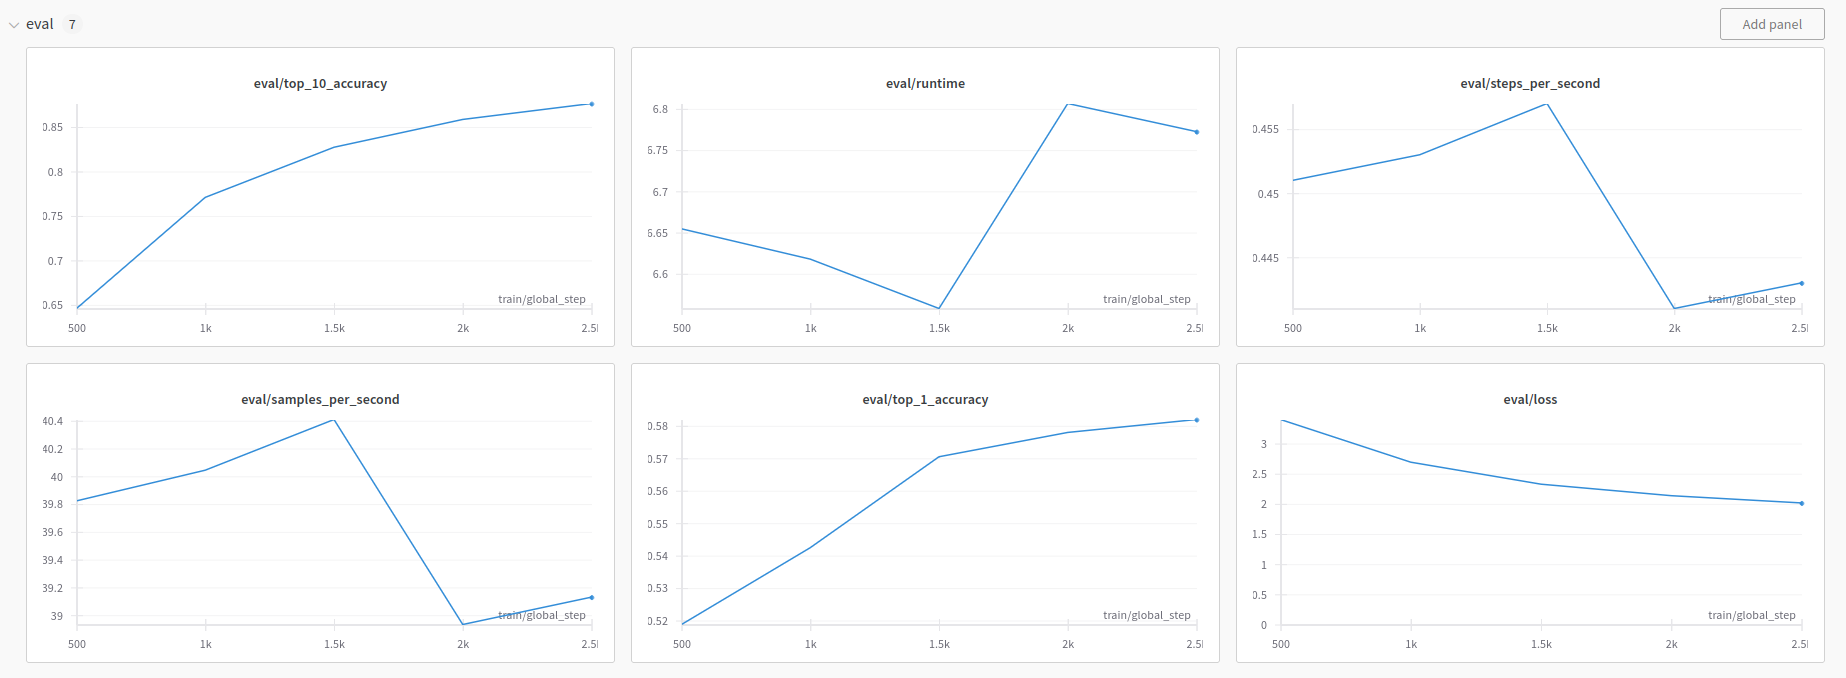

### 100 epochs, batch-size = 32, lr = 1e-4

In [30]:
TRAIN_MANIFEST = PATH_TO_TRAINING_DATA + "train.json"
DEV_MANIFEST = PATH_TO_TRAINING_DATA + "dev.json"
TEXT_TOKENS_PATH = PATH_TO_TRAINING_DATA + "unique_text_tokens.k2symbols"

OUT_DIR="experiments/t2s-lada"

!python train_t2s.py --metapath "{TRAIN_MANIFEST}" \
  --val_metapath "{DEV_MANIFEST}" \
  --text_tokens_file "{TEXT_TOKENS_PATH}" \
  --output_dir "{OUT_DIR}" \
  --model_size tiny --batch_size 32 \
  --nworkers 12 --warmup_steps 10000 \
  --save_steps 500 --n_epochs 100 \
  --learning_rate 1e-4

2024-05-19 19:14:16.278294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 19:14:16.278351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 19:14:16.280114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)
self.vocab_size = 1074
self.config = T5Config {
  "classifier_dropout": 0.0,
  "d_ff": 1024,
  "d_kv": 32,
  "d_model": 256,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 2,
  "feed_forward_proj": "relu",
  "

#### Training curves
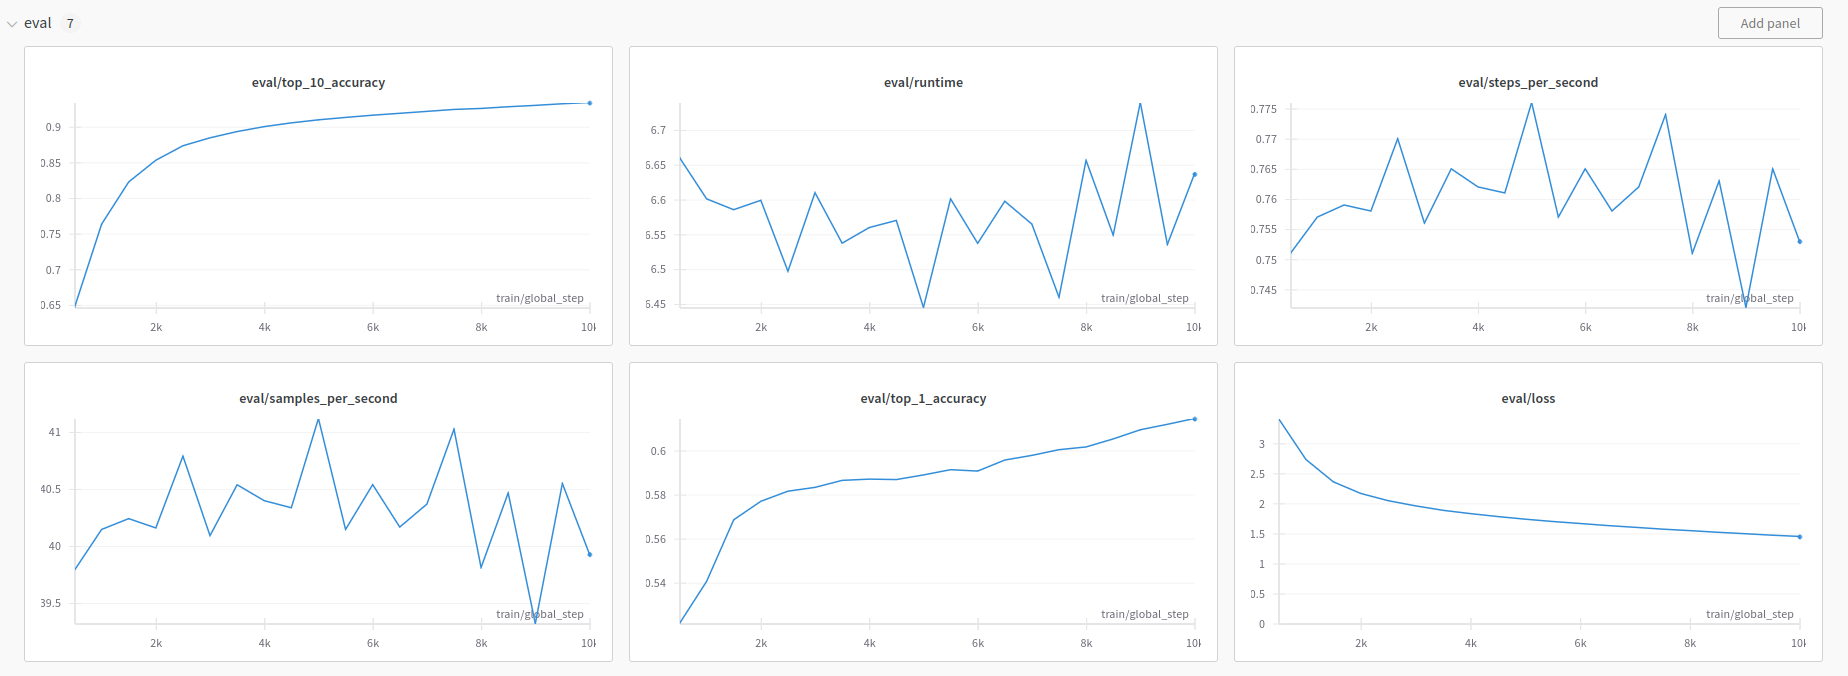

### 75 epochs, batch-size = 64, lr = 1e-3

In [32]:
TRAIN_MANIFEST = PATH_TO_TRAINING_DATA + "train.json"
DEV_MANIFEST = PATH_TO_TRAINING_DATA + "dev.json"
TEXT_TOKENS_PATH = PATH_TO_TRAINING_DATA + "unique_text_tokens.k2symbols"

OUT_DIR="experiments/t2s-lada"

!python train_t2s.py --metapath "{TRAIN_MANIFEST}" \
  --val_metapath "{DEV_MANIFEST}" \
  --text_tokens_file "{TEXT_TOKENS_PATH}" \
  --output_dir "{OUT_DIR}" \
  --model_size tiny --batch_size 64 \
  --nworkers 12 --warmup_steps 10000 \
  --save_steps 100 --n_epochs 75 \
  --learning_rate 1e-3

2024-05-19 20:08:26.041934: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 20:08:26.041990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 20:08:26.043711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)
self.vocab_size = 1074
self.config = T5Config {
  "classifier_dropout": 0.0,
  "d_ff": 1024,
  "d_kv": 32,
  "d_model": 256,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 2,
  "feed_forward_proj": "relu",
  "

#### Training curves
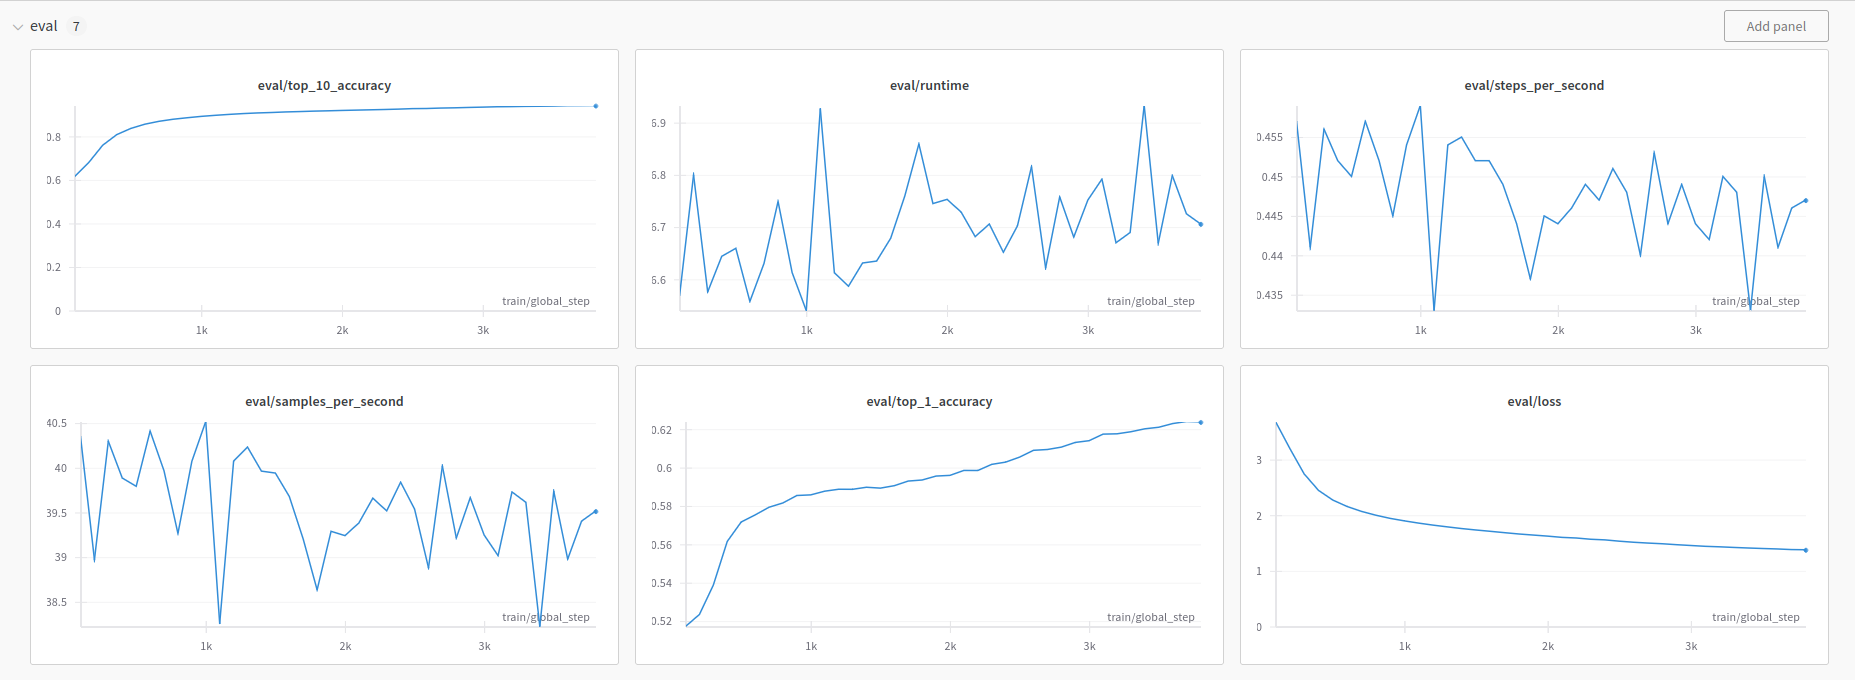

### Conclusions
We can see that loss is smaller for the last model, so there is no sense to decrease batch size or learning rate. I cannot increase batch-size, as I get CUDA out of memory error. After 400 steps loss decreases really slow, so I guess there is no reason to run more epochs than 100, as the loss is almost the same after 3000 steps. It won't decrease very much, so maybe it won't make any differences, but the time will be wasted. 